In [21]:
#   Instructions Anadolu Hayat Emelilik Kaggle Computition

#   1. Target, Data Explanation, Prepering 
#   2. Import necessary libraries
#   3. Import data 
#   4. Data Cleaning and Feature Engineering
#   5. Data Analysis and Visualization
#   6. GridSearch (Find Best Model)
#   7. Model Training
#   8. Predict Test Data
#   9. Conclusion

In [22]:
#   1. Target, Data Explanation, Preparing

"""
This competition focuses on a multiclass classification
problem, where the objective is to predict the label
column for the test data. Each entry in the dataset
 corresponds to an individual who has purchased insurance,
with additional columns such as BU and HU indicating
 previous purchases, while the label column signifies
 the insurance product bought by the customer last month.

To kick off our analysis, we'll conduct a comprehensive
examination of the dataset, diving into its various
features and distributions. It's crucial to gain a deep
understanding of the data before proceeding with any
modeling tasks. Furthermore, we'll leverage visualization
techniques to gain insights into the patterns and
trends present in the dataset, shedding light on
potential relationships between different variables.

A significant aspect of our data preprocessing phase
involves addressing missing values, denoted by NaN entries.
These missing values can significantly impact the 
performance of our models if not handled appropriately.
Additionally, we'll be on the lookout for outliers, which
can skew our analysis and model predictions.

As we prepare our data for modeling, we'll take 
steps to ensure consistency and compatibility. This 
involves addressing data type inconsistencies, performing
feature scaling to bring features to a uniform scale, and
encoding categorical variables for model compatibility.
 Once our data is properly prepared, we'll split it into
training and testing sets to facilitate model evaluation.

With our data preprocessed and split, we'll embark
on the exciting journey of model selection and optimization.
Leveraging various machine learning algorithms, we'll
search for the most suitable models and fine-tune their
 parameters to maximize predictive performance.
Our ultimate goal is to achieve the highest accuracy
and F1 score, ensuring robust and reliable predictions
for insurance purchases based on the provided dataset.
"""

"\nThis competition focuses on a multiclass classification\nproblem, where the objective is to predict the label\ncolumn for the test data. Each entry in the dataset\n corresponds to an individual who has purchased insurance,\nwith additional columns such as BU and HU indicating\n previous purchases, while the label column signifies\n the insurance product bought by the customer last month.\n\nTo kick off our analysis, we'll conduct a comprehensive\nexamination of the dataset, diving into its various\nfeatures and distributions. It's crucial to gain a deep\nunderstanding of the data before proceeding with any\nmodeling tasks. Furthermore, we'll leverage visualization\ntechniques to gain insights into the patterns and\ntrends present in the dataset, shedding light on\npotential relationships between different variables.\n\nA significant aspect of our data preprocessing phase\ninvolves addressing missing values, denoted by NaN entries.\nThese missing values can significantly impact the \

In [23]:
#   2. Import necessary libraries
#

import pandas as pd               # Data manipulation and analysis library
import numpy as np                # Numerical computing library

import seaborn as sns             # Statistical data visualization library
import matplotlib.pyplot as plt   # Plotting library

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Preprocessing tools
from sklearn.model_selection import train_test_split , GridSearchCV            # Data splitting tool and Model parametr search tools

from sklearn.pipeline import Pipeline                 # Pipeline for chaining preprocessing and modeling steps
from sklearn.impute import SimpleImputer               # Imputation for handling missing values
from sklearn.compose import ColumnTransformer          # ColumnTransformer for applying different preprocessing to different columns

from xgboost import XGBClassifier                      # XGBoost classifier for modeling

from sklearn.metrics import f1_score, accuracy_score , make_scorer  # Evaluation metrics


In [24]:
#   3. Import Data (Test and Train Data)
#
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

test_data_clean = test_data.copy()
train_data_clean = train_data.copy()

C:\Users\Samet\AppData\Local\Temp\ipykernel_17524\2134411410.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')
C:\Users\Samet\AppData\Local\Temp\ipykernel_17524\2134411410.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('test.csv')


In [25]:
#   4. Data Cleaning and Feature Engineering
#

### 4.1 Replace "," with "." to Change Data Type as Necessary
train_data_clean['SORU_GELIR_CVP'] = train_data_clean['SORU_GELIR_CVP'].str.replace(',','.')
test_data_clean['SORU_GELIR_CVP'] = test_data_clean['SORU_GELIR_CVP'].str.replace(',','.')


### 4.2 Create a New Column from Other Columns without NaN Values
train_data_clean['anket_date'] = train_data_clean['SORU_MEDENI_HAL_RG']
missing_indexs = train_data_clean[train_data_clean['anket_date'].isna()].index
train_data_clean.loc[missing_indexs, 'anket_date'] =  train_data_clean.loc[missing_indexs, 'SORU_GELIR_RG']
test_data_clean['anket_date'] = test_data_clean['SORU_MEDENI_HAL_RG']
missing_indexs = test_data_clean[test_data_clean['anket_date'].isna()].index
test_data_clean.loc[missing_indexs, 'anket_date'] =  test_data_clean.loc[missing_indexs, 'SORU_GELIR_RG']

### 4.3 Fill NaN Values with Mean for the Respective Column
train_data_clean['anket_date'].fillna(train_data_clean['anket_date'].mean(),inplace=True)
test_data_clean['anket_date'].fillna(test_data_clean['anket_date'].mean(),inplace=True)


### 4.4 Adjust Job Status to Standardize Data Representation
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Bağkur Emeklileri','PP_MESLEK'] = 'Emekli'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)','PP_MESLEK'] = 'Emekli'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Emekli (Vakıf,Sandık v.b.)','PP_MESLEK'] = 'Emekli'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Emekli Sandığı Emeklileri','PP_MESLEK'] = 'Emekli'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='SSK-Sosyal Sigortalar Kurumu Emeklileri','PP_MESLEK'] = 'Emekli'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Hekim','PP_MESLEK'] = 'Doktor'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Çalışmıyor','PP_MESLEK'] = 'İşsiz'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Mali Müşavir/Muhasebeci','PP_MESLEK'] = 'Mali Müşavir'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Diğer','PP_MESLEK'] = 'Bilinmiyor'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='other','PP_MESLEK'] = 'Bilinmiyor'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Yazılım Geliştirme Uzmanı','PP_MESLEK'] = 'Yazılımcı'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Yazılımcı/Programcı/Analist','PP_MESLEK'] = 'Yazılımcı'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Teknisyen/Tekniker','PP_MESLEK'] = 'Teknisyen'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Üniversite Öğrencisi','PP_MESLEK'] = 'Öğrenci'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Emniyet Mensubu','PP_MESLEK'] = 'Polis'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Amiral','PP_MESLEK'] = 'General'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Satış/Pazarlama Çalışanı','PP_MESLEK'] = 'Satış'
train_data_clean.loc[train_data_clean['PP_MESLEK']=='Pazarlama','PP_MESLEK'] = 'Satış'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Uzman Jandarma','PP_MESLEK'] = 'Uzman Erbaş'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Finans Sektörü Çalışan','PP_MESLEK'] = 'Finans'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Komi','PP_MESLEK'] = 'Garson'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Medya Mensubu','PP_MESLEK'] = 'Medya'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Pilot/Kaptan','PP_MESLEK'] = 'Sivil Pilot'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Subay','PP_MESLEK'] = 'Ordu Mensubu'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='İş Analisti','PP_MESLEK'] = 'Analist'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Hakim','PP_MESLEK'] = 'Hakim/Savcı'

train_data_clean.loc[train_data_clean['PP_MESLEK']=='Kamu Çalışanı','PP_MESLEK'] = 'Memur'
#############################################################################################
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Bağkur Emeklileri','PP_MESLEK'] = 'Emekli'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)','PP_MESLEK'] = 'Emekli'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Emekli (Vakıf,Sandık v.b.)','PP_MESLEK'] = 'Emekli'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Emekli Sandığı Emeklileri','PP_MESLEK'] = 'Emekli'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='SSK-Sosyal Sigortalar Kurumu Emeklileri','PP_MESLEK'] = 'Emekli'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Hekim','PP_MESLEK'] = 'Doktor'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Çalışmıyor','PP_MESLEK'] = 'İşsiz'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Mali Müşavir/Muhasebeci','PP_MESLEK'] = 'Mali Müşavir'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Diğer','PP_MESLEK'] = 'Bilinmiyor'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='other','PP_MESLEK'] = 'Bilinmiyor'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Yazılım Geliştirme Uzmanı','PP_MESLEK'] = 'Yazılımcı'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Yazılımcı/Programcı/Analist','PP_MESLEK'] = 'Yazılımcı'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Teknisyen/Tekniker','PP_MESLEK'] = 'Teknisyen'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Üniversite Öğrencisi','PP_MESLEK'] = 'Öğrenci'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Emniyet Mensubu','PP_MESLEK'] = 'Polis'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Amiral','PP_MESLEK'] = 'General'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Satış/Pazarlama Çalışanı','PP_MESLEK'] = 'Satış'
test_data_clean.loc[test_data_clean['PP_MESLEK']=='Pazarlama','PP_MESLEK'] = 'Satış'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Uzman Jandarma','PP_MESLEK'] = 'Uzman Erbaş'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Finans Sektörü Çalışan','PP_MESLEK'] = 'Finans'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Komi','PP_MESLEK'] = 'Garson'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Medya Mensubu','PP_MESLEK'] = 'Medya'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Pilot/Kaptan','PP_MESLEK'] = 'Sivil Pilot'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Subay','PP_MESLEK'] = 'Ordu Mensubu'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='İş Analisti','PP_MESLEK'] = 'Analist'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Hakim','PP_MESLEK'] = 'Hakim/Savcı'

test_data_clean.loc[test_data_clean['PP_MESLEK']=='Kamu Çalışanı','PP_MESLEK'] = 'Memur'

### 4.5 Modify Data Types
train_data_clean['SORU_GELIR_CVP'] = pd.to_numeric(train_data_clean['SORU_GELIR_CVP'])
train_data_clean['anket_date'] =  pd.to_numeric(train_data_clean['anket_date'])
train_data_clean['PP_MUSTERI_SEGMENTI'] = train_data_clean['PP_MUSTERI_SEGMENTI'].astype('object')
train_data_clean['PP_CINSIYET'] = train_data_clean['PP_CINSIYET'].astype('object')
train_data_clean['PP_UYRUK'] = train_data_clean['PP_UYRUK'].astype('object')
train_data_clean['IL'] = train_data_clean['IL'].astype('object')

test_data_clean['SORU_GELIR_CVP'] = pd.to_numeric(test_data_clean['SORU_GELIR_CVP'])
test_data_clean['anket_date'] =  pd.to_numeric(test_data_clean['anket_date'])
test_data_clean['PP_MUSTERI_SEGMENTI'] = test_data_clean['PP_MUSTERI_SEGMENTI'].astype('object')
test_data_clean['PP_CINSIYET'] = test_data_clean['PP_CINSIYET'].astype('object')
test_data_clean['PP_UYRUK'] = test_data_clean['PP_UYRUK'].astype('object')
test_data_clean['IL'] = test_data_clean['IL'].astype('object')


#### Although there are still missing values in the dataset, we will fill them in the pipeline.

C:\Users\Samet\AppData\Local\Temp\ipykernel_17524\3402994893.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_clean['anket_date'].fillna(train_data_clean['anket_date'].mean(),inplace=True)
C:\Users\Samet\AppData\Local\Temp\ipykernel_17524\3402994893.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [26]:
#   5. Data Analysis and Visualization
#
analysis_data = train_data_clean.copy() # copy data

total_cell = analysis_data.size
total_cell_nan = analysis_data.isna().sum().sum()
percent_nan = (total_cell_nan / total_cell) *100 

print(percent_nan) # Percentage of NaN Values
print(analysis_data.shape) # Number of columns and rows
print(analysis_data.columns) # Columns name

10.043535168450713
(852719, 98)
Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_A

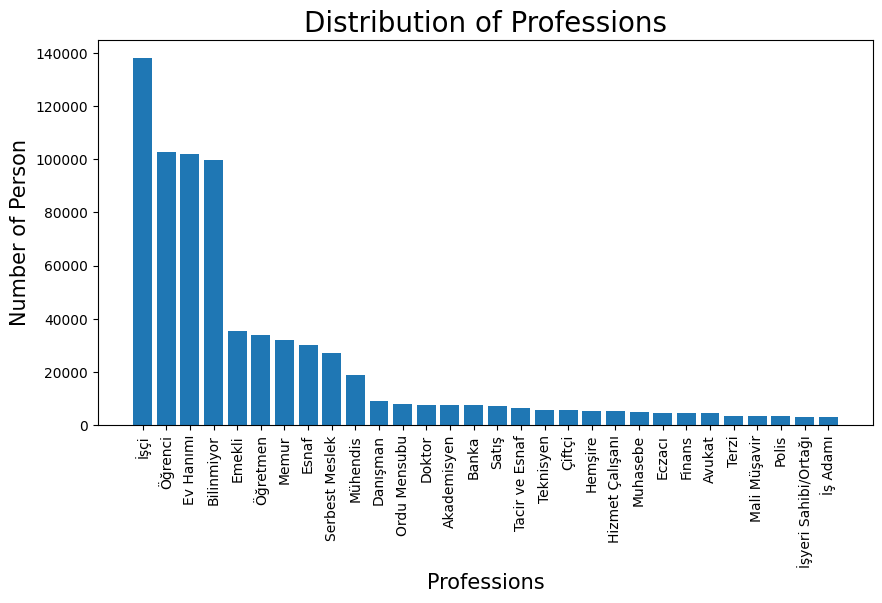

In [27]:
#   5.1 Distribution of Professions Graph
#
job_data = analysis_data.groupby(['PP_MESLEK'])['PP_MESLEK'].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(10,5))
plt.bar(job_data.index,job_data.values)
plt.title("Distribution of Professions",size=20)
plt.ylabel("Number of Person",size=15)
plt.xlabel("Professions",size=15)
plt.xticks(rotation=90)
plt.show()


#   In this graph, the predominant occupation is depicted,
#   with the category "bilinmiyor" representing instances
#   where the job status is unknown or unspecified.
#   It's evident that there is a diverse range of job 
#   categories represented, showcasing the varied
#   employment statuses among individuals in the dataset.
#   Understanding the distribution of occupations can offer 
#   valuable insights into the demographic makeup of the population
#   under study. Furthermore, identifying the prevalence of unknown
#   job statuses highlights potential data gaps or areas for further
#   investigation to ensure the comprehensiveness and accuracy of
#   the dataset. This analysis aids in better understanding
#   the characteristics and profiles of the individuals 
#   included in the dataset, enabling more informed decision-making 
#   and targeted interventions in relevant domains.

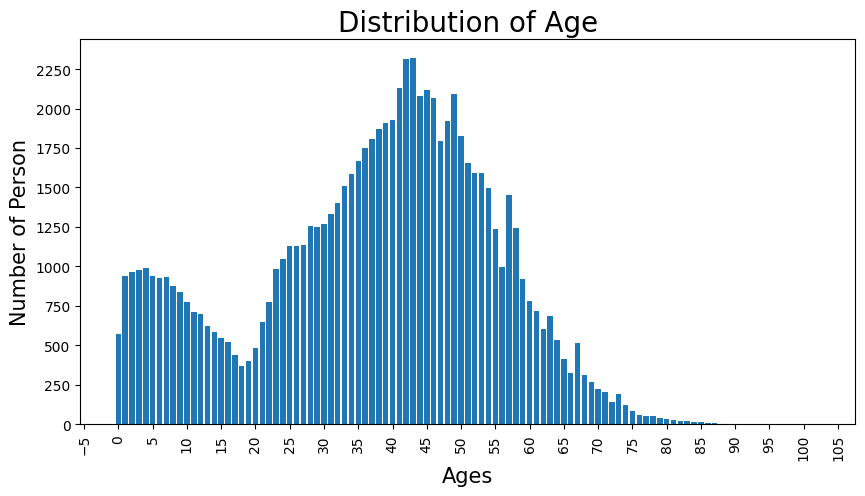

In [28]:
#   5.2 Distribution of Age

age_data = analysis_data.groupby(['PP_YAS'])['PP_YAS'].count().sort_values(ascending=False)
age_data.index = (age_data.index / 12).astype(int) 
age_data.drop(122,inplace=True)

plt.figure(figsize=(10,5))
plt.bar(age_data.index,age_data.values)
plt.title("Distribution of Age",size=20)
plt.ylabel("Number of Person",size=15)
plt.xlabel("Ages",size=15)
plt.xticks(rotation=90)
plt.locator_params(axis='x',nbins=30)
plt.locator_params(axis='y',nbins=10)
plt.show()


# In this graph, we observe the distribution of age
# among individuals who have purchased insurance.
# It reveals that the majority of insurance purchases 
# are made by individuals aged between 40 and 55,
# indicating a peak in insurance uptake during this 
# age range. Interestingly, there is also a notable
# portion of insurance purchases made by parents for 
# their children, suggesting a consideration for family
# coverage or protection. This insight into age 
# distribution sheds light on the demographic trends
# in insurance purchasing behavior, which can be 
# valuable for insurance companies in tailoring their
#  marketing strategies and product offerings to specific
# age groups.

C:\Users\Samet\AppData\Local\Temp\ipykernel_17524\1270190835.py:21: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',nbins=30)


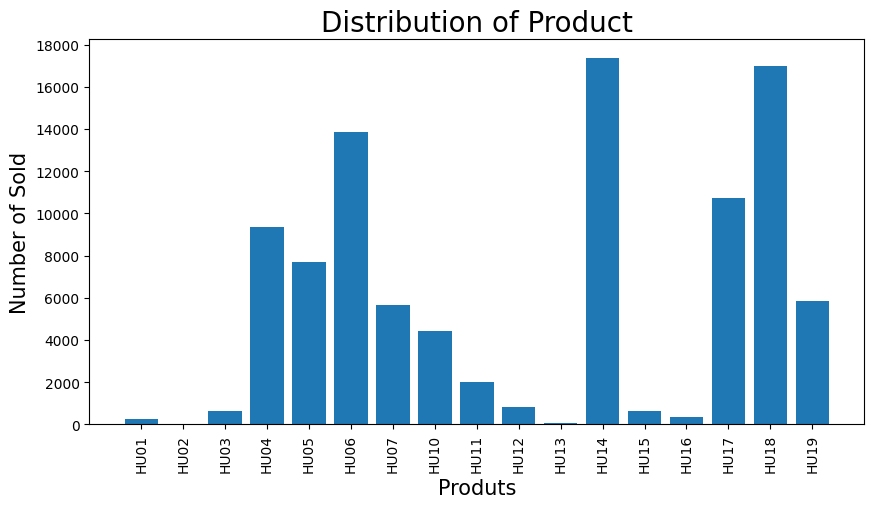

In [29]:
#   5.3 Distribution of Product

group_list = ['HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06',
       'HU07', 'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17',
       'HU18', 'HU19']


product_data = []
for columns_ in group_list:
    product_data.append(analysis_data[columns_].sum())
dict_ = {"group_list":group_list,"product_data":product_data}
product_df = pd.DataFrame(dict_)


plt.figure(figsize=(10,5))
plt.bar(product_df['group_list'],product_df['product_data'])
plt.title("Distribution of Product",size=20)
plt.ylabel("Number of Sold",size=15)
plt.xlabel("Produts",size=15)
plt.xticks(rotation=90)
plt.locator_params(axis='x',nbins=30)
plt.locator_params(axis='y',nbins=10)
#plt.yscale('log')
plt.show()

# In this graph, we can see the distribution of
# product purchases. It gives us a quick snapshot
# of which products are popular among customers 
# and which ones are not as popular. This information 
# can help businesses understand their customers'
# preferences better and make decisions about their
# product offerings and marketing strategies.

In [30]:
"""#   6. GridSearch (Find Best Model)

label_encoder = LabelEncoder()

X = train_data_clean.drop('LABEL',axis=1)
y = label_encoder.fit_transform(train_data_clean['LABEL'])


# Separate categorical and numerical
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Numerical datatype steps 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

# Categorical datatype steps 
categorical_transformer = Pipeline(steps=[
    #('imputer',SimpleImputer(strategy='most_frequent')),    
    ('imputer',SimpleImputer(strategy='constant', fill_value='Unknown')), 
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Columns merge 
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features),
    ]
)

# Make pipeline 
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',XGBClassifier())
])

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

scorer = make_scorer(f1_score,average='macro')

# Hiperparametr 
param_grid = {
    'classifier__max_depth': [5],
    'classifier__learning_rate': [0.35],
    'classifier__n_estimators': [115],
    'classifier__objective': ['reg:squarederror'],
    'classifier__booster': ['gbtree'],
    'classifier__subsample': [0.9],
}

# Make GridSearch
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, n_jobs=-1,verbose=0)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Print best model
for t,u in grid_search.best_params_.items() :
    print(t,u)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)"""

'#   6. GridSearch (Find Best Model)\n\nlabel_encoder = LabelEncoder()\n\nX = train_data_clean.drop(\'LABEL\',axis=1)\ny = label_encoder.fit_transform(train_data_clean[\'LABEL\'])\n\n\n# Separate categorical and numerical\nnumeric_features = X.select_dtypes(include=[\'int64\',\'float64\']).columns\ncategorical_features = X.select_dtypes(include=[\'object\']).columns\n\n\n# Numerical datatype steps \nnumeric_transformer = Pipeline(steps=[\n    (\'imputer\', SimpleImputer(strategy=\'mean\')),\n    (\'scaler\',StandardScaler())\n])\n\n# Categorical datatype steps \ncategorical_transformer = Pipeline(steps=[\n    #(\'imputer\',SimpleImputer(strategy=\'most_frequent\')),    \n    (\'imputer\',SimpleImputer(strategy=\'constant\', fill_value=\'Unknown\')), \n    (\'onehot\',OneHotEncoder(handle_unknown=\'ignore\'))\n])\n\n# Columns merge \npreprocessor = ColumnTransformer(\n    transformers=[\n        (\'num\',numeric_transformer,numeric_features),\n        (\'cat\',categorical_transformer,ca

In [31]:
#   7. Model Training

label_encoder = LabelEncoder()

X = train_data_clean.drop('LABEL',axis=1)
y = label_encoder.fit_transform(train_data_clean['LABEL'])


# Separate categorical and numerical
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Numerical datatype steps 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

# Categorical datatype steps 
categorical_transformer = Pipeline(steps=[
    #('imputer',SimpleImputer(strategy='most_frequent')),    
    ('imputer',SimpleImputer(strategy='constant', fill_value='Unknown')), 
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Columns merge 
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features),
    ]
)


# Make pipeline 
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',XGBClassifier(

    max_depth=5,
    learning_rate=0.35,
    n_estimators=116,
    #verbosity=1,
    #objective='reg:squarederror',
    #booster='gbtree',
    #n_jobs=-1,
    #random_state=None,
    subsample=0.9
    ))
])

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.01,random_state=42)
 
pipeline.fit(X_train,y_train)

accuracy = pipeline.score(X_test,y_test)
y_pred = pipeline.predict(X_test)
f1scoree = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1scoree}")

Accuracy: 0.9777204502814258
F1 Score: 0.28779222159725254


In [32]:
#   8. Predict test data

test_data_pre12 = pipeline.predict(test_data_clean)

label_encoder_pre = LabelEncoder()

lbl_e_data = train_data.copy()

lbl_e_data['LABEL'] = label_encoder_pre.fit_transform(lbl_e_data['LABEL']) 

result_pred = label_encoder_pre.inverse_transform(test_data_pre12)

result_df = pd.DataFrame({
    "MUSTERI_ID":test_data['MUSTERI_ID'] ,
    "LABEL": result_pred
})

# Create submission file
result_df.to_csv('submission20.csv',index=False)

In [33]:
# 9. Conclusion

"""Multi Class sales prediction. My submission secured the 30th position (top 11%)
out of 268 competitors and 185 teams. Over the course of 12 days, I dedicated
myself to refining my approach, making a total of 44 attempts. Notably,
my private leaderboard results were stronger, potentially placing me 
in the 13th spot (approximately in the top 4%) with the correct final submission.

The competition challenge revolved around predicting whether customers
would choose from various insurance types within a specified timeframe,
based on their historical insurance statuses and
individual retirement policies.

For my ultimate solution, I utilized a diverse
toolkit including Pipeline, Xgboost and Grid Search."""

'Multi Class sales prediction. My submission secured the 30th position (top 11%)\nout of 268 competitors and 185 teams. Over the course of 12 days, I dedicated\nmyself to refining my approach, making a total of 44 attempts. Notably,\nmy private leaderboard results were stronger, potentially placing me \nin the 13th spot (approximately in the top 4%) with the correct final submission.\n\nThe competition challenge revolved around predicting whether customers\nwould choose from various insurance types within a specified timeframe,\nbased on their historical insurance statuses and\nindividual retirement policies.\n\nFor my ultimate solution, I utilized a diverse\ntoolkit including Pipeline, Xgboost and Grid Search.'